<a href="https://colab.research.google.com/github/sandeeptuluri/codvo-ai/blob/main/Tuluri_Sandeep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
# Exercise-1 Data Preparation and Preprocessing.

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
# importing the files as data frames

In [96]:
demo_d = pd.read_csv("https://raw.githubusercontent.com/sandeeptuluri/codvo-ai/main/DEMO_D.csv")

In [97]:
bpx_d = pd.read_csv("https://raw.githubusercontent.com/sandeeptuluri/codvo-ai/main/BPX_D.csv")

In [98]:
tchol_d = pd.read_csv("https://raw.githubusercontent.com/sandeeptuluri/codvo-ai/main/TCHOL_D.csv")

In [99]:
# merging the data frames

In [100]:
from functools import reduce

In [101]:
dfs = [demo_d,bpx_d,tchol_d]

In [102]:
df_final = reduce(lambda left,right : pd.merge(left,right, on='SEQN'), dfs)

In [232]:
df_final.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI,AGE_AT_SCREENING,AGE_AT_EXAM,DMDEDUC,HIGHEST_EDUCATION
0,31128.0,4.0,2.0,2.0,132.0,132.0,11.0,4.0,4.0,0.0,1.0,1.0,401.0,NaN,NaN,2.0,129.0,3.34,132.0,138.0,4.0,ELEMENTARY
1,31129.0,4.0,2.0,1.0,189.0,190.0,15.0,4.0,10.0,0.0,1.0,1.0,664.0,NaN,NaN,1.0,170.0,4.40,180.0,186.0,10.0,ELEMENTARY
2,31130.0,4.0,2.0,2.0,NaN,NaN,85.0,3.0,0.0,4.0,NaN,2.0,NaN,4.0,NaN,2.0,NaN,NaN,1020.0,1026.0,4.0,ELEMENTARY
3,31131.0,4.0,2.0,2.0,535.0,536.0,44.0,4.0,0.0,4.0,NaN,1.0,827.0,NaN,NaN,2.0,105.0,2.72,528.0,534.0,4.0,ELEMENTARY
4,31132.0,4.0,2.0,1.0,842.0,843.0,70.0,3.0,0.0,5.0,NaN,1.0,730.0,NaN,NaN,2.0,147.0,3.80,840.0,846.0,5.0,ELEMENTARY


In [104]:
# As given in the document of demo_d, we can fill the missing values by converting the years into months at the time of screening.

In [105]:
df_final['AGE_AT_SCREENING'] = (df_final['RIDAGEYR'] * 12)

In [106]:
# As we don't have the (RIDEXMON) column in the data, so we dont have the details when the examination conducted.
# But it is mentioned that the examination is held at two intervals.
# I am assuming that it may take 6 months as an average to conduct the examination for the citizens.
# so i am taking +6  months to the RIDAGEMN as RIDAGEEX.

In [107]:
df_final['AGE_AT_EXAM'] = (df_final['AGE_AT_SCREENING'] + 6)

In [108]:
df_final.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI,AGE_AT_SCREENING,AGE_AT_EXAM
0,31128.0,4.0,2.0,2.0,132.0,132.0,11.0,4.0,4.0,NaN,1.0,1.0,401.0,NaN,NaN,2.0,129.0,3.34,132.0,138.0
1,31129.0,4.0,2.0,1.0,189.0,190.0,15.0,4.0,10.0,NaN,1.0,1.0,664.0,NaN,NaN,1.0,170.0,4.40,180.0,186.0
2,31130.0,4.0,2.0,2.0,NaN,NaN,85.0,3.0,NaN,4.0,NaN,2.0,NaN,4.0,NaN,2.0,NaN,NaN,1020.0,1026.0
3,31131.0,4.0,2.0,2.0,535.0,536.0,44.0,4.0,NaN,4.0,NaN,1.0,827.0,NaN,NaN,2.0,105.0,2.72,528.0,534.0
4,31132.0,4.0,2.0,1.0,842.0,843.0,70.0,3.0,NaN,5.0,NaN,1.0,730.0,NaN,NaN,2.0,147.0,3.80,840.0,846.0


In [109]:
# As the values in the education section are not in a proper manner i formed an another column combining the two columns so that i have given the status
# of their education as mentioned in the instructions and by following documents.

In [110]:
df_final.DMDEDUC3 = round(df_final.DMDEDUC3,1)

In [111]:
df_final.DMDEDUC2 = df_final.DMDEDUC2.replace(np.nan,0)

In [112]:
df_final.DMDEDUC3 = df_final.DMDEDUC3.replace(np.nan,0)

In [113]:
df_final['DMDEDUC'] = df_final['DMDEDUC2'] + df_final['DMDEDUC3']

In [114]:
# created a new column (DMDEDUC)

In [115]:
df_final.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI,AGE_AT_SCREENING,AGE_AT_EXAM,DMDEDUC
0,31128.0,4.0,2.0,2.0,132.0,132.0,11.0,4.0,4.0,0.0,1.0,1.0,401.0,NaN,NaN,2.0,129.0,3.34,132.0,138.0,4.0
1,31129.0,4.0,2.0,1.0,189.0,190.0,15.0,4.0,10.0,0.0,1.0,1.0,664.0,NaN,NaN,1.0,170.0,4.40,180.0,186.0,10.0
2,31130.0,4.0,2.0,2.0,NaN,NaN,85.0,3.0,0.0,4.0,NaN,2.0,NaN,4.0,NaN,2.0,NaN,NaN,1020.0,1026.0,4.0
3,31131.0,4.0,2.0,2.0,535.0,536.0,44.0,4.0,0.0,4.0,NaN,1.0,827.0,NaN,NaN,2.0,105.0,2.72,528.0,534.0,4.0
4,31132.0,4.0,2.0,1.0,842.0,843.0,70.0,3.0,0.0,5.0,NaN,1.0,730.0,NaN,NaN,2.0,147.0,3.80,840.0,846.0,5.0


In [116]:
# Giving the status of the education.
# by using the Binning

In [117]:
bins = [0, 12, 16, 99]

In [118]:
edu_level = ['ELEMENTARY','HIGHSCHOOL','COLLEGE']

In [119]:
df_final['HIGHEST_EDUCATION'] = pd.cut(df_final['DMDEDUC'], bins, labels=edu_level)

In [120]:
# Assigning the Highest level of education to the person.

In [121]:
# Filling the NaN as 'ELEMENTARY', as we don't have the perfect data of their education in the document also

In [122]:
df_final['HIGHEST_EDUCATION'] = df_final['HIGHEST_EDUCATION'].fillna('ELEMENTARY')

In [123]:
# Here is the status of their highest level of their education.

In [231]:
df_final.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI,AGE_AT_SCREENING,AGE_AT_EXAM,DMDEDUC,HIGHEST_EDUCATION
0,31128.0,4.0,2.0,2.0,132.0,132.0,11.0,4.0,4.0,0.0,1.0,1.0,401.0,NaN,NaN,2.0,129.0,3.34,132.0,138.0,4.0,ELEMENTARY
1,31129.0,4.0,2.0,1.0,189.0,190.0,15.0,4.0,10.0,0.0,1.0,1.0,664.0,NaN,NaN,1.0,170.0,4.40,180.0,186.0,10.0,ELEMENTARY
2,31130.0,4.0,2.0,2.0,NaN,NaN,85.0,3.0,0.0,4.0,NaN,2.0,NaN,4.0,NaN,2.0,NaN,NaN,1020.0,1026.0,4.0,ELEMENTARY
3,31131.0,4.0,2.0,2.0,535.0,536.0,44.0,4.0,0.0,4.0,NaN,1.0,827.0,NaN,NaN,2.0,105.0,2.72,528.0,534.0,4.0,ELEMENTARY
4,31132.0,4.0,2.0,1.0,842.0,843.0,70.0,3.0,0.0,5.0,NaN,1.0,730.0,NaN,NaN,2.0,147.0,3.80,840.0,846.0,5.0,ELEMENTARY


In [125]:
# Going to the retired section.

In [126]:
retired = pd.read_csv('https://raw.githubusercontent.com/sandeeptuluri/codvo-ai/main/DEMO_RETIRED.CSV')

In [127]:
retired.head()

,SEQN,RETIRED
0,31127.0,NaN
1,31128.0,0.0
2,31129.0,0.0
3,31130.0,1.0
4,31131.0,0.0


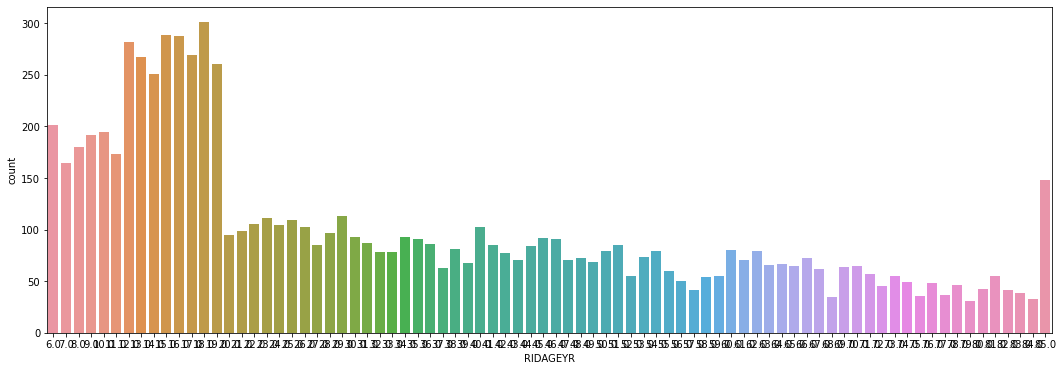

In [128]:
plt.figure(figsize=(18,6))
sns.countplot(x='RIDAGEYR',data=df_final)

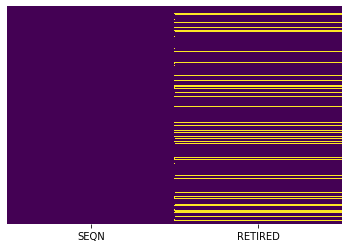

In [129]:
sns.heatmap(retired.isnull(), yticklabels=False, cmap='viridis', cbar= False)

In [130]:
# From the countplot we know that we are having the many people who are aged more than 67.
# From the heatmap we know that we are having many null values.

In [131]:
# As per the rules in the united states the retirement age is around 67. so, i am taking the 67 is the retirement age to fill the null values.

In [132]:
# For those who are having 67 and above i am assigning them as retired.

In [133]:
final = pd.merge(df_final,retired,on='SEQN')

In [134]:
final.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI,AGE_AT_SCREENING,AGE_AT_EXAM,DMDEDUC,HIGHEST_EDUCATION,RETIRED
0,31128.0,4.0,2.0,2.0,132.0,132.0,11.0,4.0,4.0,0.0,1.0,1.0,401.0,NaN,NaN,2.0,129.0,3.34,132.0,138.0,4.0,ELEMENTARY,0.0
1,31129.0,4.0,2.0,1.0,189.0,190.0,15.0,4.0,10.0,0.0,1.0,1.0,664.0,NaN,NaN,1.0,170.0,4.40,180.0,186.0,10.0,ELEMENTARY,0.0
2,31130.0,4.0,2.0,2.0,NaN,NaN,85.0,3.0,0.0,4.0,NaN,2.0,NaN,4.0,NaN,2.0,NaN,NaN,1020.0,1026.0,4.0,ELEMENTARY,1.0
3,31131.0,4.0,2.0,2.0,535.0,536.0,44.0,4.0,0.0,4.0,NaN,1.0,827.0,NaN,NaN,2.0,105.0,2.72,528.0,534.0,4.0,ELEMENTARY,0.0
4,31132.0,4.0,2.0,1.0,842.0,843.0,70.0,3.0,0.0,5.0,NaN,1.0,730.0,NaN,NaN,2.0,147.0,3.80,840.0,846.0,5.0,ELEMENTARY,1.0


In [135]:
final.RETIRED.isnull().sum()

0

In [144]:
# but we can assign the resigned status only after knowing the age, after merging the dataframes we are not getting the age of the persons with null values

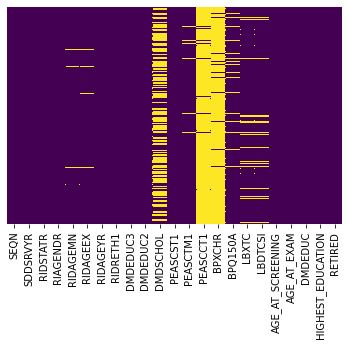

In [142]:
sns.heatmap(final.isnull(), yticklabels=False, cmap='viridis', cbar=False)

Now there are no null values,from the heatmap in the retired column

...

.....

EXERCISE - 2 : MODEL BUILDING

.....

 Building model for the customers who are going to claim their insurance in their first year.

Loading the data.

In [192]:
claim_pred = pd.read_csv("https://raw.githubusercontent.com/sandeeptuluri/codvo-ai/main/claim_prediction.csv")

In [193]:
claim_pred.head()

,EADDC,EAFXA,FDDBC,AFDDA,AXCXA,EXCCE,FBXFC,DFFEC,CEXAE,BBADX,CLAIM
0,-0.193513,0.021062,-0.870351,4.314903,-4.260162,-1.259531,0.175603,-0.942903,2.333260,4.678712,0
1,2.667844,-3.195978,2.718651,-0.885312,2.964261,2.161336,2.008505,-0.296360,-0.610780,-2.545978,1
2,2.280602,0.048539,-2.179863,-0.380866,-1.212960,2.097278,5.131315,-1.250050,2.362880,2.207307,0
3,0.592376,-1.590548,2.329976,-1.416489,1.743390,3.040990,2.371740,-0.190549,0.890761,-2.671923,0
4,1.236896,-0.656180,-0.381064,-2.332379,0.660684,2.055621,0.478162,-0.269513,2.614886,-3.655301,0


In [194]:
# let's check the info and features of the dataset.

In [195]:
claim_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EADDC   10000 non-null  float64
 1   EAFXA   10000 non-null  float64
 2   FDDBC   10000 non-null  float64
 3   AFDDA   10000 non-null  float64
 4   AXCXA   10000 non-null  float64
 5   EXCCE   10000 non-null  float64
 6   FBXFC   10000 non-null  float64
 7   DFFEC   10000 non-null  float64
 8   CEXAE   10000 non-null  float64
 9   BBADX   10000 non-null  float64
 10  CLAIM   10000 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


In [196]:
# As the data is cleaned and well scaled, we will now move forward to the correlation in the dataframe.

In [197]:
# let's check the correlation between the features by using a heatmap

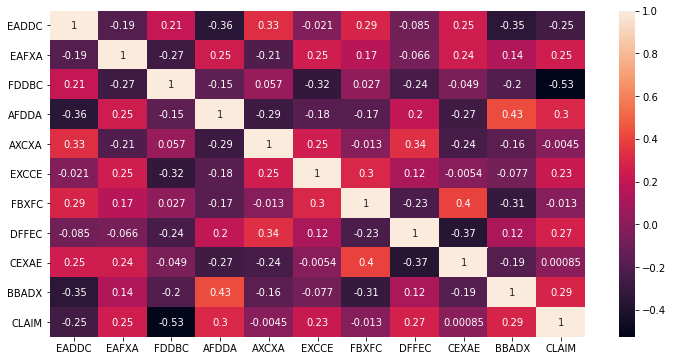

In [198]:
plt.figure(figsize=(12,6))
sns.heatmap(claim_pred.corr(), annot = True)

In [199]:
# From the heatmap we can know that, only some features are highly correlating with the "CLAIM" feature.
# The features are 'EAFXA','AFDDA','EXCCE','DFFEC','BBADX',and finally 'CEXAE'.

In [200]:
# we are dropping some columns, to create a new dataframe to effectively feed the model for better results.

In [201]:
claim_pred.columns

Index(['EADDC', 'EAFXA', 'FDDBC', 'AFDDA', 'AXCXA', 'EXCCE', 'FBXFC', 'DFFEC',
       'CEXAE', 'BBADX', 'CLAIM'],
      dtype='object')

In [202]:
claim_pred = claim_pred.drop(['EADDC','FDDBC','AXCXA','FBXFC'], axis=1)

In [203]:
claim_pred.head()

,EAFXA,AFDDA,EXCCE,DFFEC,CEXAE,BBADX,CLAIM
0,0.021062,4.314903,-1.259531,-0.942903,2.333260,4.678712,0
1,-3.195978,-0.885312,2.161336,-0.296360,-0.610780,-2.545978,1
2,0.048539,-0.380866,2.097278,-1.250050,2.362880,2.207307,0
3,-1.590548,-1.416489,3.040990,-0.190549,0.890761,-2.671923,0
4,-0.656180,-2.332379,2.055621,-0.269513,2.614886,-3.655301,0


In [204]:
# now the data looks good, we can train model now.

In [205]:
# lets split the data by loading the functions.

In [206]:
from sklearn.model_selection import train_test_split

In [207]:
X = claim_pred.drop(['CLAIM'],axis=1)
y = claim_pred['CLAIM']

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Importing the Logistic Regression model and fitting and training the data.

In [208]:
from sklearn.linear_model import LogisticRegression

In [215]:
log_model = LogisticRegression()

In [216]:
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting the performance of the model trained.

In [217]:
predictions = log_model.predict(X_test)

Printing the metrics of the model

In [218]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [224]:
log_train_accu = accuracy_score(y_train,log_model.predict(X_train))
log_test_accu = accuracy_score(y_test, predictions)

print(f'Training accuracy of the logistic regression is :{log_train_accu}')
print(f'Testing accuracy of the logistic regression is :{log_test_accu}')
print('\n')
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Training accuracy of the logistic regression is :0.7374285714285714
Testing accuracy of the logistic regression is :0.7466666666666667


              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1519
           1       0.75      0.74      0.74      1481

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.75      0.75      3000



[[1145  374]
 [ 386 1095]]


This model doesn't seems to be a good one

Let's check another model for better accuracy.

Importing support vector classifier from SVM

In [226]:
from sklearn.svm import SVC

svclassifier = SVC()

svclassifier.fit(X_train, y_train)

svpred = svclassifier.predict(X_test)

In [229]:
svc_train_accu = accuracy_score(y_train, svclassifier.predict(X_train))
svc_test_accu = accuracy_score(y_test, svpred)

print(f'Training accuracy of the support vector classifier is :{svc_train_accu}')
print(f'Testing accuracy of the support vector classifier is :{svc_test_accu}')
print('\n')
print(classification_report(y_test, svpred))
print('\n')
print(confusion_matrix(y_test, svpred))

Training accuracy of the support vector classifier is :0.8584285714285714
Testing accuracy of the support vector classifier is :0.8523333333333334


              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1519
           1       0.83      0.87      0.85      1481

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



[[1262  257]
 [ 186 1295]]


This model seems good let's check some other model.

Import KNeighbors Classifier

In [228]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

knc.fit(X_train, y_train)

knc_pred = knc.predict(X_test)

In [230]:
knc_train_accu = accuracy_score(y_train,knc.predict(X_train))
knc_test_accu = accuracy_score(y_test, knc_pred)

print(f'Training accuracy of the kneighbors classifier is :{log_train_accu}')
print(f'Testing accuracy of the kneighbors classifier is :{log_test_accu}')
print('\n')
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Training accuracy of the kneighbors classifier is :0.7374285714285714
Testing accuracy of the kneighbors classifier is :0.7466666666666667


              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1519
           1       0.75      0.74      0.74      1481

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.75      0.75      3000



[[1145  374]
 [ 386 1095]]


From all the three models i assume the SUPPORT VECTOR CLASSIFIER gives the best accuracy for the data. because this model best fits this type of data and it will perform well for the new similar data that are going to be given.

...

...

EXERCISE - 3 : MODEL EVALUATION

....

1. Answer for the 1st question.

  * Actually there is no perfect answer for the number of clusters, because it depends on the method used to find the similarities and parameters for partition. but there many indices to find the optimal number of clusters for better results. the two major approaches are domain knowledge and data driven approach.

  * The efficacy of the KMeans Clustering largely depends on the optimal number of clusters given in the model. if clusters are too high, each point boardly start representing a cluster and if clusters are low, the data points are incorrectly clustered. so selecting the optimal numbers of clusters gives the best efficiency.


2. Answer for the 2nd question.

  * High variance can be reduced by dropping least important or unwanted features in the dataset before training the model.
  * Increasing the size of the training set also can reduce the high variance.
  * Reducing the overfitting, having reasonable variance, avoiding nosiy data helps in fixing the bias, it is better to leave the linear models when the target and features don't match that better.

3. Answer to the 3rd question.

    * I will choose a model 4 (training error - 105, validation error - 85).
    Because, training error depends on the quality of the data, at some point of time in training model, the training accuracy increases and validation accuracy decreases. so this model gives the better validation score comparing to the other other models that is going to give better accuracy when validated with test data.

4. Answer to the 4th question.

    * Recall = (True positive) / (true positive + false negative)
             = (112/(112+97))
             = 0.535
    
    * Precision = (truepositive) / (true positive + false positive)
                = (112/(112+48))
                = 0.7

    * F1 score = 2*(Precision*Recall)/(Precision + Recall)
               = (2*(0.535*0.7))/(0.535+0.7)
               = 0.606

    * If i have to choose this model i will focus on Type 2 error(False postives and false negatives), because while dealing with the cancer, if it is given positive for non-cancer patients and negative for cancer patients there is no point of doing it. The metric i am going to choose is 'misclassification',focusing on these things we can eliminate maximum errors.

    * if i have to deal with a youtube video i will go with Type 1 error(false positives). there is no meaning if we recommended inappropriate video(false positives) to the users. the metric i am going to focus is Precison where i can better deal with the best positive decion(video) i can make.

....

...

EXERCISE - 4 : ANOMALY DETECTION.

...